In [5]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [7]:
df1 = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
print(df1)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

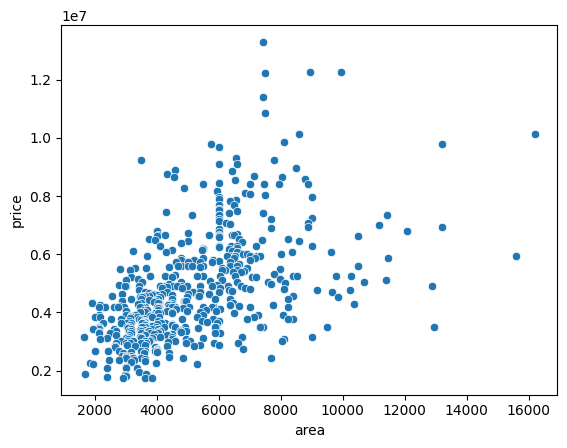

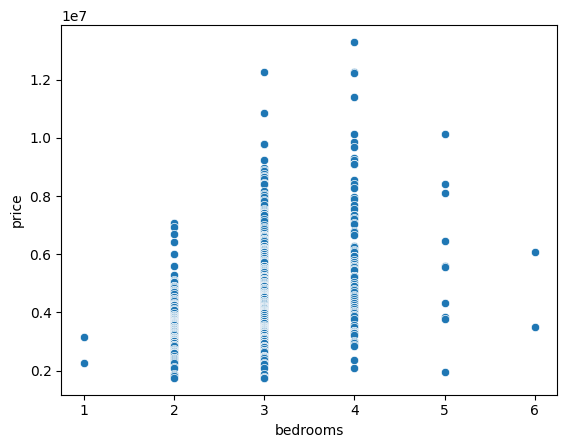

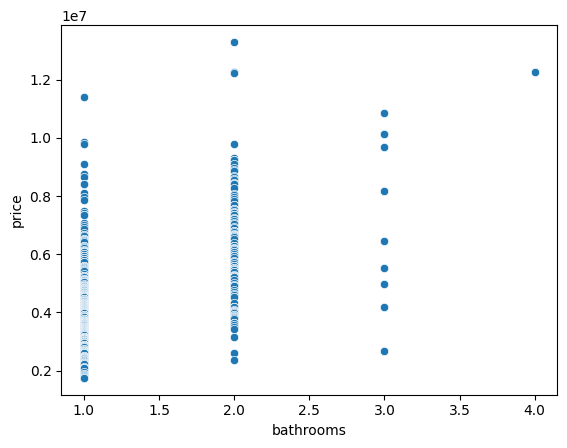

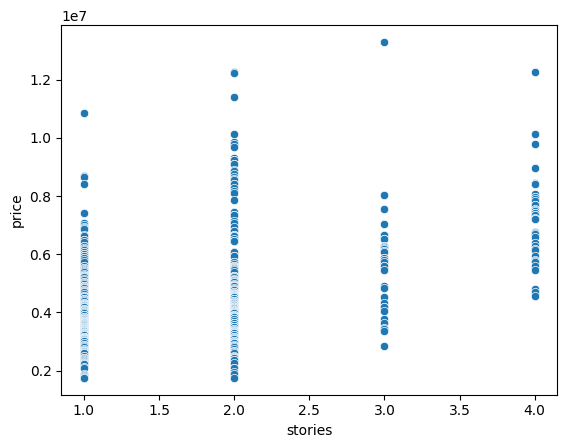

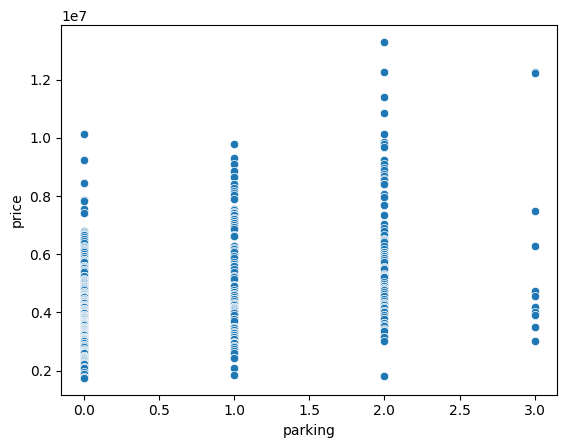

In [ ]:
numerical_feature = df1.select_dtypes(include=['int', 'float']).columns
for i in numerical_feature:
  if i != "price":
    sns.scatterplot(x = df1[i], y = df1["price"])
    plt.show()

In [ ]:
X = df1.drop(["price"],axis = 1)
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=42)

In [ ]:
df1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
scalar.fit(df1)


MinMaxScaler()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

<ipython-input-58-c2fa5e3e242d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Perfect prediction')


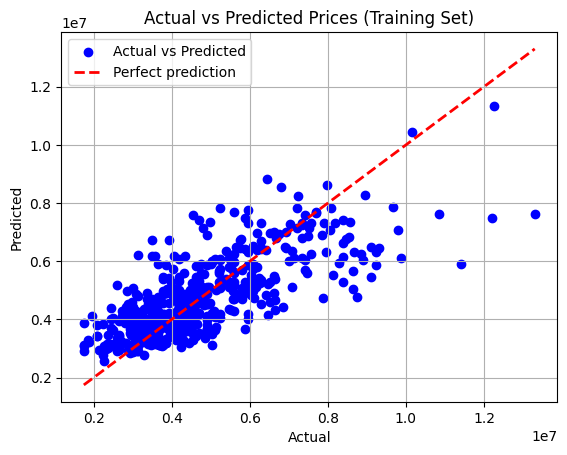

In [ ]:
train_predictions = lr.predict(X_train)

plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (490, 5)
Shape of y_train: (490,)


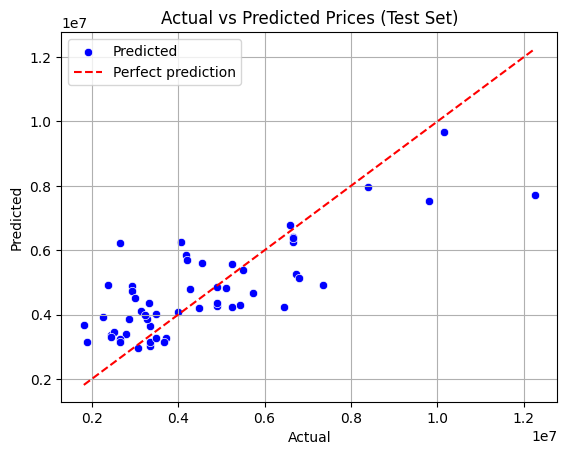

In [ ]:
test_predictions = lr.predict(X_test)

test_results = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

sns.scatterplot(x='Actual', y='Predicted', data=test_results, color='blue', label='Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions = lr.predict(X_test)
#print(predictions)

r2_score(y_test,predictions)*100

60.042788523351874